In [105]:
!pip install arabic-reshaper python-bidi

In [106]:

#Import all relevant libraries
#import ipyvizzu as ipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper

from bidi.algorithm import get_display
#from scipy.stats import zscore
#from ydata_profiling import ProfileReport
#from pandas_profiling import ProfileReport

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [107]:

file_path = "Riyadh_Aqqar.xlsx"

# Load the "Villas (الفلل)" sheet into a DataFrame
df_villas = pd.read_excel(file_path, sheet_name="Villas (الفلل)")

# Load the "Apartments (الشقق)" sheet into a DataFrame
df_apartments = pd.read_excel(file_path, sheet_name="Apartments (الشقق)")

In [108]:
df_apartments.head(10)


,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000
3,شقة,الرياض,حي النرجس,شمالية,3,1.0,3,101,1,0,0,أرضي,0.0,1,1200000
4,شقة,الرياض,حي الياسمين,شرقية,4,1.0,3,147,1,0,1,علوي,2.0,1,1200000
5,شقة,الرياض,حي الياسمين,NaN,3,1.0,2,118,1,0,1,3,0.0,0,850000
6,شقة,الرياض,حي النرجس,شرقية,3,1.0,3,112,1,0,0,أرضي,0.0,0,885000
7,شقة,الرياض,حي النرجس,شرقية,2,1.0,3,100,1,0,1,3,0.0,0,1200000
8,شقة,الرياض,حي النرجس,جنوبية شرقية,3,1.0,3,170,1,0,1,ثالث,NaN,1,930000
9,شقة,الرياض,حي العقيق,NaN,3,1.0,3,115,0,1,1,NaN,11.0,0,1100000


In [109]:
df_apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [110]:
df_apartments.head(3)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [111]:
df_apartments.head(3)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000


In [112]:
df_apartments.shape

(551, 15)

In [113]:
df_apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')

In [114]:
df_apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [115]:
df_apartments.describe(include="number")
#price القيمه الأقل
# length القيمه الاقل و الأعلى (من الممكن انها بيانات غير منطقية )
#width القيمه الاقل و الأعلى (من الممكن انها بيانات غير منطقية )

,عدد الغرف,عدد الصالات,المساحة,مطبخ,مدخل سيارة,مصعد,عمر العقار,مؤثثة,السعر الاجمالي
count,551.000000,541.000000,551.000000,551.000000,551.000000,551.000000,550.000000,551.000000,5.510000e+02
mean,3.029038,1.253235,151.633394,0.735027,0.346642,0.689655,1.385455,0.165154,1.137539e+06
std,0.755026,0.443694,41.423181,0.441720,0.476333,0.463055,2.955740,0.371657,3.315825e+05
min,1.000000,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+05
25%,3.000000,1.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+05
50%,3.000000,1.000000,142.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.100000e+06
75%,3.000000,1.000000,169.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.270000e+06
max,6.000000,3.000000,428.000000,1.000000,1.000000,1.000000,13.000000,1.000000,3.500000e+06


In [116]:
df_apartments.describe(include="object")

,نوع العقار,المدينة,الحي,الواجهة,عدد الحمامات,الدور
count,551,551,551,389,551,477
unique,1,5,26,9,5,10
top,شقة,الرياض,حي النرجس,شمالية,3,أرضي
freq,551,477,134,96,396,178


In [117]:
df_apartments[df_apartments["السعر الاجمالي"] == df_apartments["السعر الاجمالي"].min()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
193,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
260,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
374,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
488,شقة,الرياض,حي العقيق,NaN,3,2.0,3,123,1,0,1,أرضي,11.0,0,700000


In [118]:
df_apartments['المدينة'].unique()

array([' الرياض ', ' منطقة الرياض', ' امارة منطقة الرياض', ' الرياض',
       ' حي العارض '], dtype=object)

In [119]:
df_apartments['الواجهة'].unique()

array(['جنوبية', 'شمالية غربية', nan, 'شمالية', 'شرقية', 'جنوبية شرقية',
       'ثلاث شوارع', 'غربية', 'جنوبية غربية', 'شمالية شرقية'],
      dtype=object)

In [120]:
df_apartments['عدد الحمامات'].unique()  # لرؤية القيم الفريدة

array([3, 2, 4, '5+', 1], dtype=object)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [121]:
#في صفحة Kaggle المذكورة، تم الإشارة إلى مصدر البيانات، ولكننا لسنا متأكدين منه.

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [122]:
# The data was collected two years ago(~2023).

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [123]:
#بعد مراجعة شاملة للأعمدة في جميع مجموعات البيانات المتوفرة
# يمكننا التأكيد بثقة على أنها متوافقة ومتسقة عبر جميع المجموعات دون أي تناقضات أو اختلافات.

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


بعد تحليل البيانات، قررنا حذف عمود الصور نظرًا لعدم أهميته في التحليل الحالي ولتقليل حجم البيانات وتحسين كفاءة المعالجة.

In [124]:
#بعد تحليل البيانات، قررنا عدم حذف اي عمود


#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


##### **3- 3- df_apartments**

In [125]:
df_apartments.head(2)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000


In [126]:
df_apartments.duplicated().sum()

139

In [127]:
df_apartments[df_apartments.duplicated(keep=False)].sort_values(by="السعر الاجمالي")

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
374,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
193,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
260,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
82,شقة,منطقة الرياض,الرياض,شرقية,3,1.0,2,104,1,1,1,3,7.0,0,715000
527,شقة,منطقة الرياض,الرياض,شمالية,3,1.0,2,104,0,1,1,3,1.0,0,715000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,شقة,الرياض,حي الصحافة,NaN,2,1.0,3,142,1,1,1,NaN,7.0,0,1980000
291,شقة,الرياض,حي الصحافة,NaN,2,1.0,3,142,1,1,1,NaN,7.0,0,1980000
199,شقة,الرياض,حي الصحافة,NaN,2,1.0,3,142,1,1,1,NaN,7.0,0,1980000
16,شقة,الرياض,حي النخيل,ثلاث شوارع,2,1.0,3,140,0,1,1,علوي,0.0,0,3300000


#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [128]:
df_apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [129]:
df_apartments.isnull().sum()

,0
نوع العقار,0
المدينة,0
الحي,0
الواجهة,162
عدد الغرف,0
عدد الصالات,10
عدد الحمامات,0
المساحة,0
مطبخ,0
مدخل سيارة,0


In [130]:
df_apartments['الواجهة'].unique()

array(['جنوبية', 'شمالية غربية', nan, 'شمالية', 'شرقية', 'جنوبية شرقية',
       'ثلاث شوارع', 'غربية', 'جنوبية غربية', 'شمالية شرقية'],
      dtype=object)

In [131]:
df_apartments['الدور'].unique()

array([3, 'علوي', 'أرضي', 'ثالث', nan, 4, 'ثاني', 'دور 59', 'ارضي', '20+',
       'اول'], dtype=object)

In [132]:
df_apartments['عمر العقار'].unique()

array([ 0.,  2., nan, 11.,  1.,  7.,  3., 10.,  9.,  5.,  4., 13.,  8.,
       12.,  6.])

In [133]:
df_apartments['المدينة'].unique()

array([' الرياض ', ' منطقة الرياض', ' امارة منطقة الرياض', ' الرياض',
       ' حي العارض '], dtype=object)

In [134]:
df_apartments.isnull().sum()

,0
نوع العقار,0
المدينة,0
الحي,0
الواجهة,162
عدد الغرف,0
عدد الصالات,10
عدد الحمامات,0
المساحة,0
مطبخ,0
مدخل سيارة,0


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [135]:
# check columns types
df_apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [136]:
df_apartments.head(3)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000


In [137]:
df_apartments['عدد الصالات'].unique()

array([ 1.,  2., nan,  3.])

In [138]:
df_apartments['عدد الحمامات'].unique()

array([3, 2, 4, '5+', 1], dtype=object)

In [139]:
df_apartments['مطبخ'].unique()

array([1, 0])

In [140]:
df_apartments['مدخل سيارة'].unique()

array([0, 1])

In [141]:
df_apartments['مصعد'].unique()

array([1, 0])

In [142]:
df_apartments['مطبخ'].unique()

array([1, 0])

In [143]:
df_apartments['عمر العقار'].unique()

array([ 0.,  2., nan, 11.,  1.,  7.,  3., 10.,  9.,  5.,  4., 13.,  8.,
       12.,  6.])

We change the data type for these columns `apartments`, `bathrooms`, and `lounges` to int data type.

In [144]:
df_apartments["مؤثثة"].unique()

array([0, 1])

In [145]:
# go to clean them
# Done

In [146]:
# check outliers

**What is an Outlier?**
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [147]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [148]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics

In [149]:
# go to delete ouliers

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [150]:
df_villas['السعر المربع'] = df_villas['السعر الاجمالي'] / df_villas['المساحة']

In [151]:
df_villas = df_villas.dropna(subset=['الواجهة'])
print(df_villas['الواجهة'].isnull().sum())

0


In [152]:
columns_to_fill = ['عدد الغرف', 'عدد الصالات', 'عدد الحمامات', 'عرض الشارع']
df_villas[columns_to_fill] = df_villas[columns_to_fill].fillna(0)

<ipython-input-152-7712cfb8336c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_villas[columns_to_fill] = df_villas[columns_to_fill].fillna(0)


In [153]:
df_villas.head()

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,...,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي,السعر المربع
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,0.0,244.0,1,...,1,1,0,1,0,0,1,1,2300000,9426.229508
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,0.0,322.0,1,...,1,1,1,1,0,0,1,1,3000000,9316.770186
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,0.0,350.0,1,...,1,0,1,0,0,1,1,1,2600000,7428.571429
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,0.0,350.0,1,...,1,0,0,1,0,1,1,1,2600000,7428.571429
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,0.0,270.0,1,...,1,1,0,0,0,0,1,0,2800000,10370.370370


In [154]:
df_villas['عدد الغرف'].unique()

array([6, 3, 4, '7+', 5, 2, 1, 0], dtype=object)

In [155]:
df_villas['عدد الغرف'].unique()

array([6, 3, 4, '7+', 5, 2, 1, 0], dtype=object)

In [156]:
df_villas['عدد الصالات'].unique()

array([3, 4, 2, 1, 5, '7+', 0], dtype=object)

In [157]:
df_villas['عدد الحمامات'].unique()

array(['5+', 4, 3, 2, 1, 0], dtype=object)

In [158]:
df_villas['عدد الغرف'] = df_villas['عدد الغرف'].apply(lambda x: 7 if x == "7+" else int(x))
df_villas['عدد الصالات'] = df_villas['عدد الصالات'].apply(lambda x: 7 if x == "7+" else int(x))
df_villas['عدد الحمامات'] = df_villas['عدد الحمامات'].apply(lambda x: 5 if x == "5+" else int(x))
df_villas['السعر الاجمالي'] = df_villas['السعر الاجمالي'].astype(float)
df_villas.dtypes

,0
نوع العقار,object
المدينة,object
الحي,object
الواجهة,object
عدد الغرف,int64
عدد الصالات,int64
عدد الحمامات,int64
عرض الشارع,float64
المساحة,float64
درج صالة,int64


In [159]:
df_villas.loc[df_villas['المدينة'] != 'الرياض', 'المدينة'] = 'الرياض'
df_villas['المدينة'].value_counts()

,count
المدينة,
الرياض,1059


##### **realEstate**

## clean drop_duplicates

In [160]:
df_apartments.drop_duplicates(inplace=True)

## fill the Null Values

In [161]:
#
df_apartments[['الواجهة', 'الدور']] = df_apartments[['الواجهة', 'الدور']].fillna("غير معروف")
df_apartments['عمر العقار'] = df_apartments['عمر العقار'].fillna(-1.0)
df_apartments['عدد الصالات'] = df_apartments['عدد الصالات'].fillna(0)

## change the data types

In [162]:
df_apartments['المدينة'] = df_apartments['المدينة'].replace(
    [' الرياض ', ' منطقة الرياض', ' امارة منطقة الرياض', ' الرياض', ' حي العارض '], 'الرياض'
)


In [163]:
df_apartments['عدد الصالات'] = df_apartments['عدد الصالات'].astype(int)
df_apartments['مطبخ'] = df_apartments['مطبخ'].astype(bool)
df_apartments['مدخل سيارة'] = df_apartments['مدخل سيارة'].astype(bool)
df_apartments['مصعد'] = df_apartments['مصعد'].astype(bool)
df_apartments['عمر العقار'] = df_apartments['عمر العقار'].astype(int)
df_apartments['مؤثثة'] = df_apartments['مؤثثة'].astype(bool)




## 3. Univariate Analysis:

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [164]:
df_apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')

In [165]:
pie = df_apartments['الحي'].value_counts()
pie

,count
الحي,
حي النرجس,95
حي الملقا,82
حي العارض,48
الرياض,40
حي الياسمين,25
حي القيروان,21
حي حطين,16
حي الندى,11
حي المروج,9


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

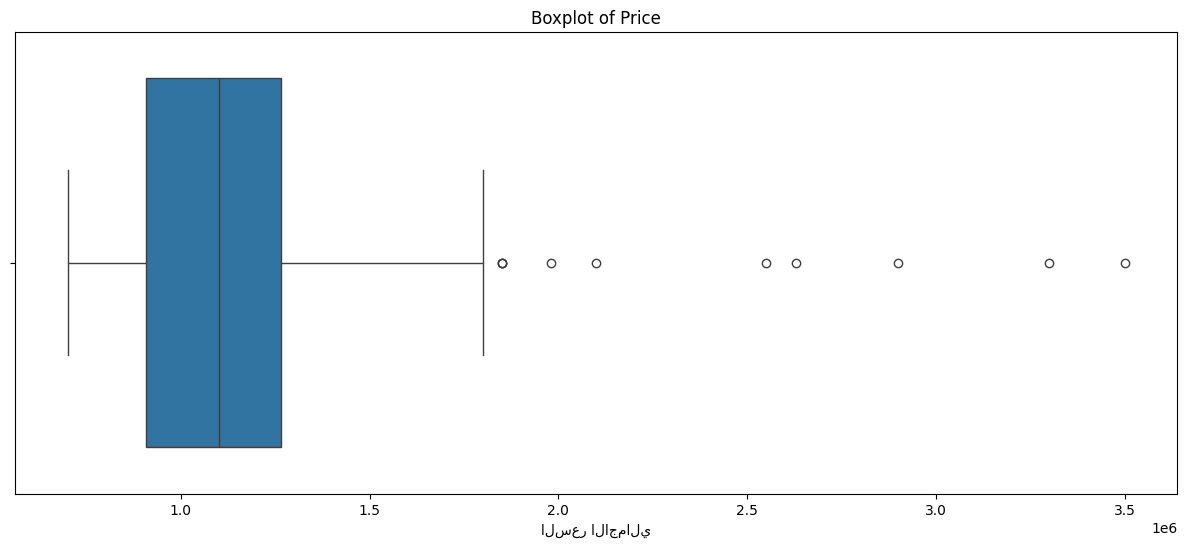

In [166]:
# رسم Boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_apartments['السعر الاجمالي'])
plt.title("Boxplot of Price")
plt.show()
# رسم Boxplot


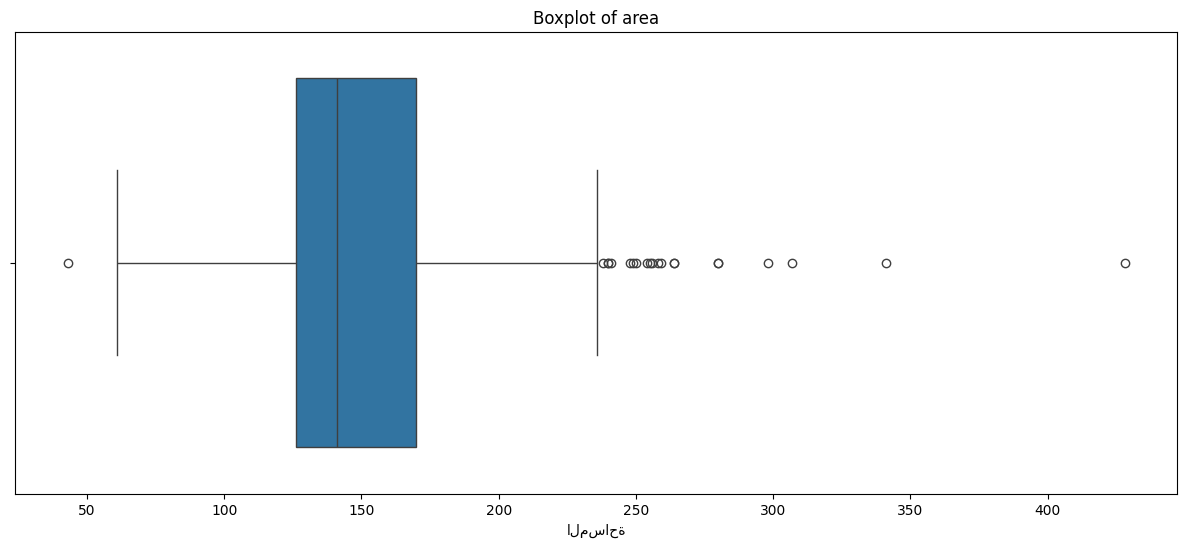

In [167]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_apartments['المساحة'])
plt.title("Boxplot of area")
plt.show()

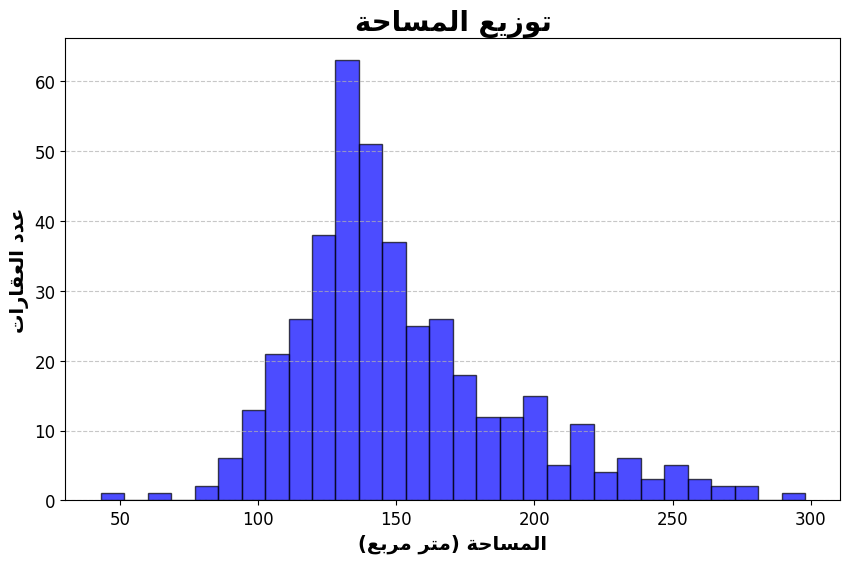

In [168]:

# Fix Arabic text rendering
title_text = get_display(arabic_reshaper.reshape("توزيع المساحة"))
xlabel_text = get_display(arabic_reshaper.reshape("المساحة (متر مربع)"))
ylabel_text = get_display(arabic_reshaper.reshape("عدد العقارات"))


df_filtered = df_apartments[(df_apartments['المساحة'] <= 300)].copy()

# Plot histogram again with fixed Arabic text
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['المساحة'], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Apply correct Arabic labels
plt.title(title_text, fontsize=20, fontweight='bold')
plt.xlabel(xlabel_text, fontsize=14, fontweight='bold')
plt.ylabel(ylabel_text, fontsize=14, fontweight='bold')

# Adjust layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the fixed plot
plt.show()


## Statistic

### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [169]:
df_apartments.shape

(412, 15)

In [170]:
# price outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_apartments['السعر الاجمالي'].quantile(0.25)
Q3 = df_apartments['السعر الاجمالي'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  Remove outliers: Keep only rows where 'price' is within the bounds
df=df_apartments[(df_apartments['السعر الاجمالي'] >= lower_bound) & (df_apartments['السعر الاجمالي'] <= upper_bound)]
df.shape

(402, 15)

In [171]:
df['السعر الاجمالي'].unique()

array([1434000,  980000, 1050000, 1200000,  850000,  885000,  930000,
       1100000, 1300000,  950000,  959000, 1190000, 1320000, 1375000,
       1400000,  990000, 1499000, 1000000,  830000, 1070000, 1450000,
       1249000, 1205000,  899000, 1350000, 1800000,  800000, 1379000,
       1500000, 1250000, 1150000,  900000,  799000,  969000, 1199000,
        715000, 1079000,  849000,  890000,  896000, 1369000, 1065000,
        820000, 1429000, 1700000,  985000, 1260000, 1179000,  745000,
       1650000, 1550000, 1490000,  970000,  840000,  750000, 1399000,
       1020000, 1180000, 1600000, 1176000,  790000,  920000,  955000,
       1255600,  909000, 1155000, 1069000,  860000,  910000, 1089000,
       1289000, 1328465,  700000,  839000, 1730000, 1299000, 1160000,
       1390000,  957000, 1620000, 1233000, 1029000, 1189000, 1149000,
        859000,  995000,  940000, 1099000,  945000,  906000,  979000,
        949000,  895000,  960000, 1245000,  846000, 1570000, 1019000,
        889000, 1064

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

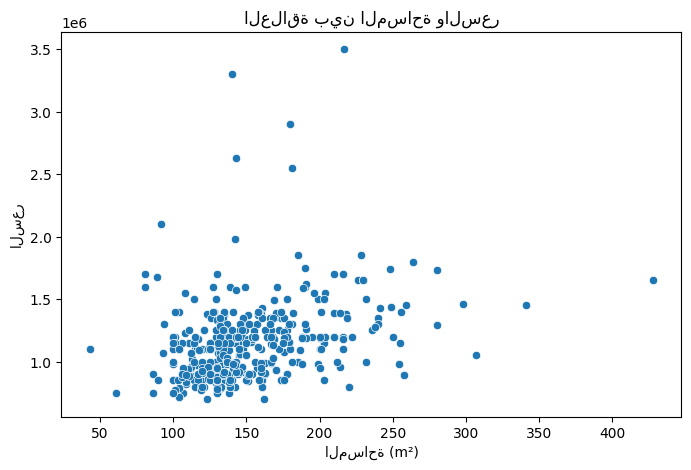

In [172]:
plt.figure(figsize=(8,5))
df_filtered = df_apartments[df_apartments['المساحة'] > 10]
sns.scatterplot(x=df_filtered['المساحة'], y=df_filtered['السعر الاجمالي'])
plt.title("العلاقة بين المساحة والسعر")
plt.xlabel("المساحة (m²)")
plt.ylabel("السعر")
plt.show()


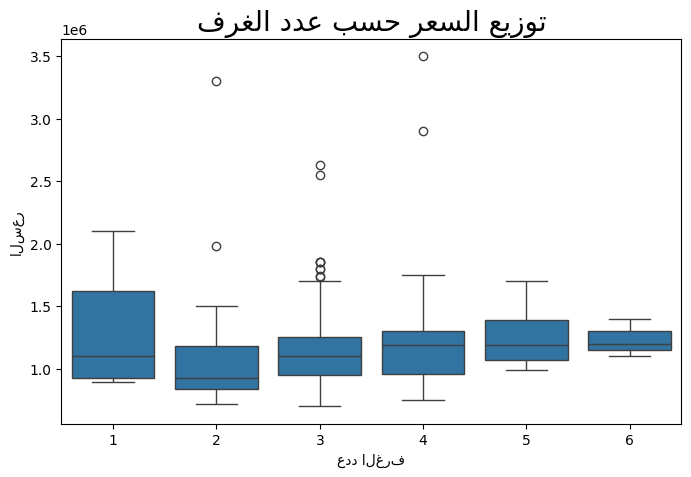

In [173]:
title_text = get_display(arabic_reshaper.reshape("توزيع السعر حسب عدد الغرف"))

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_apartments['عدد الغرف'], y=df_apartments['السعر الاجمالي'])  # تصحيح: استخدم "السعر" في y
plt.title(title_text, fontsize=20)
plt.xlabel("عدد الغرف")
plt.ylabel("السعر")
plt.show()


# Questions Answers:

### العلاق التي تؤثر على سعر الشقق

### السؤال العلاقة بين المساحة و السعر مع تمييز عدد الغرف

In [174]:
df_apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')

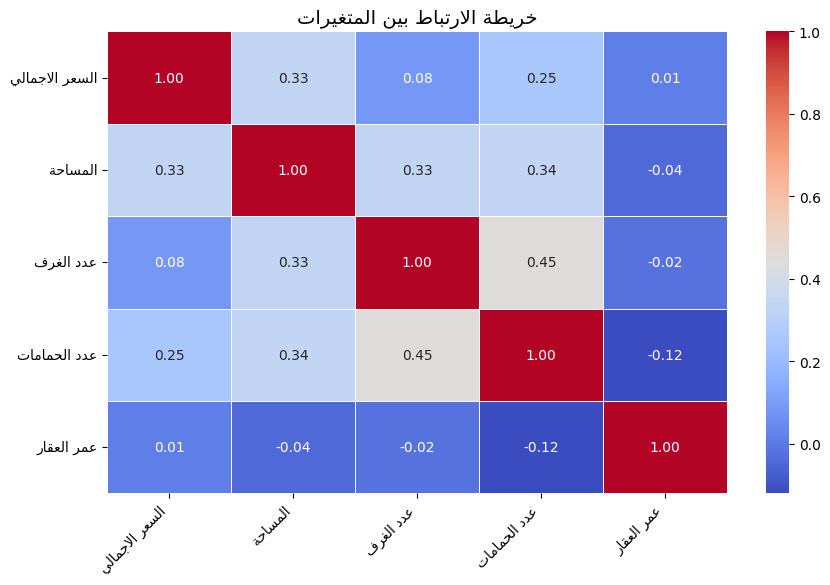

In [175]:
# تصفية البيانات لاستبعاد القيم غير المنطقية
df_filtered = df_apartments[(df_apartments['عمر العقار'] >= 0) & (df_apartments['السعر الاجمالي'] > 500)].copy()

# تنظيف الأعمدة التي قد تحتوي على قيم غير قابلة للتحويل
def clean_column(col):
    return col.astype(str).str.replace('+', '').str.strip()

# تنظيف وتحويل الأعمدة إلى أرقام
df_filtered['عدد الغرف'] = pd.to_numeric(clean_column(df_filtered['عدد الغرف']), errors='coerce')
df_filtered['السعر الاجمالي'] = pd.to_numeric(df_filtered['السعر الاجمالي'], errors='coerce')
df_filtered['المساحة'] = pd.to_numeric(df_filtered['المساحة'], errors='coerce')
df_filtered['عدد الحمامات'] = pd.to_numeric(df_filtered['عدد الحمامات'], errors='coerce')
df_filtered['عمر العقار'] = pd.to_numeric(df_filtered['عمر العقار'], errors='coerce')

# إزالة الصفوف التي تحتوي على قيم مفقودة بعد التنظيف
df_filtered = df_filtered.dropna(subset=['السعر الاجمالي', 'عدد الغرف', 'المساحة', 'عدد الحمامات', 'عمر العقار'])

# تحديد العوامل المهمة فقط
important_factors = ['السعر الاجمالي', 'المساحة', 'عدد الغرف', 'عدد الحمامات', 'عمر العقار']

# حساب مصفوفة الارتباط للعوامل المهمة
filtered_corr_matrix = df_filtered[important_factors].corr()

# ضبط حجم الرسم البياني
plt.figure(figsize=(10, 6))

# إنشاء المخطط الحراري
ax = sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# إعادة تشكيل النصوص العربية
xticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()]
yticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_yticklabels()]

# ضبط النصوص بعد التعديل
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontfamily="Arial", fontsize=10)
ax.set_yticklabels(yticklabels, rotation=0, ha="right", fontfamily="Arial", fontsize=10)

# إضافة العنوان
plt.title(get_display(arabic_reshaper.reshape("خريطة الارتباط بين المتغيرات")), fontsize=14)

# عرض المخطط
plt.show()


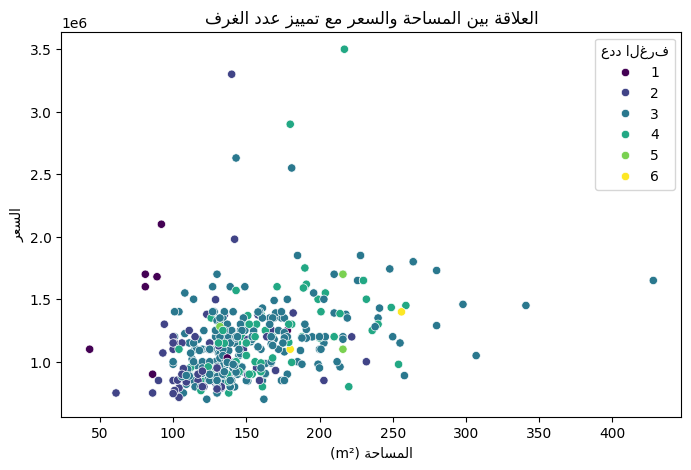

In [176]:
title_text = get_display(arabic_reshaper.reshape("العلاقة بين المساحة والسعر مع تمييز عدد الغرف"))
title_text1 = get_display(arabic_reshaper.reshape("المساحة (m²)"))
title_text2 = get_display(arabic_reshaper.reshape("السعر"))


df_filtered = df_apartments[(df_apartments['عمر العقار'] >= 0) & (df_apartments['السعر الاجمالي'] > 500)]

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_filtered['المساحة'], y=df_filtered['السعر الاجمالي'], hue=df_filtered['عدد الغرف'], palette="viridis")
plt.title(title_text)
plt.xlabel(title_text1)
plt.ylabel(title_text2)
plt.show()


### سؤال ما هي الأحياء التي تحتوي على أكبر عدد من الشقق؟

<ipython-input-177-c2b0b058a270>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_districts['الحي'], y=top_districts['count'], palette="viridis")
<ipython-input-177-c2b0b058a270>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()], rotation=45)


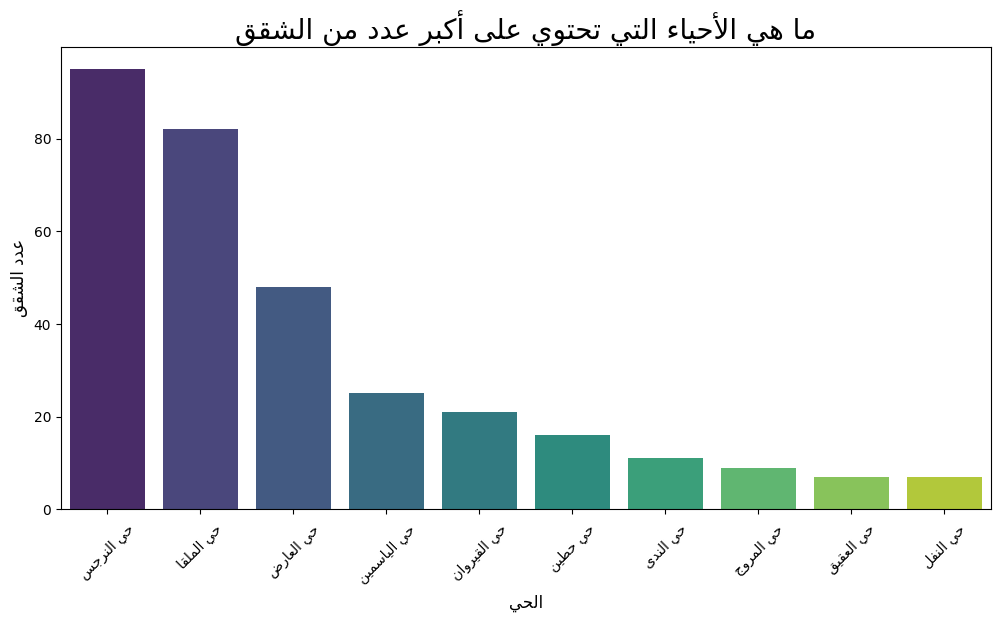

In [177]:

# حساب عدد الشقق في كل حي
district_counts = df_apartments[df_apartments['الحي'] != ' الرياض ']['الحي'].value_counts().reset_index()
district_counts.columns = ['الحي', 'count']

# أخذ أكثر 10 أحياء بها شقق
top_districts = district_counts.head(10)

# تجهيز النصوص العربية
title_text = get_display(arabic_reshaper.reshape('ما هي الأحياء التي تحتوي على أكبر عدد من الشقق'))
xlabel_text = get_display(arabic_reshaper.reshape('الحي'))
ylabel_text = get_display(arabic_reshaper.reshape('عدد الشقق'))

# رسم مخطط Bar Chart
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_districts['الحي'], y=top_districts['count'], palette="viridis")

# تعديل التسميات إلى العربية
ax.set_xticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()], rotation=45)

# تسميات المحاور والعنوان
plt.xlabel(xlabel_text, fontsize=12)
plt.ylabel(ylabel_text, fontsize=12)
plt.title(title_text, fontsize=20)

plt.show()



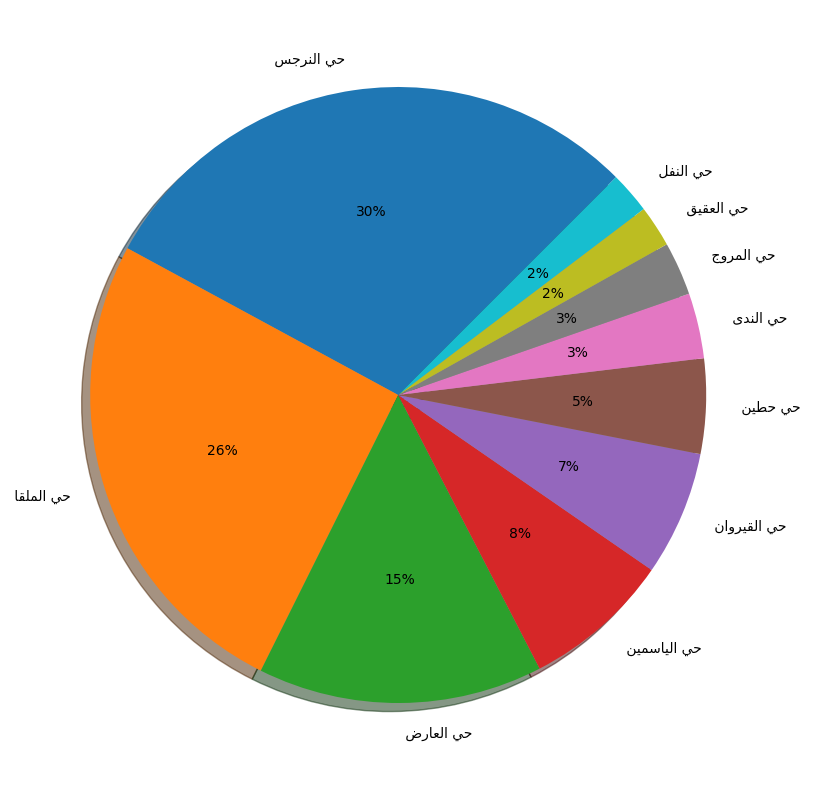

In [178]:
pie = df_apartments[df_apartments['الحي'] != ' الرياض ']['الحي'].value_counts()

# إصلاح النصوص العربية
labels = [get_display(arabic_reshaper.reshape(label)) for label in pie[:10].index]

# رسم مخطط الدائرة مع النصوص المصححة
plt.figure(figsize=(10, 10))
plt.pie(
    x=pie[:10].values,
    labels=labels,
    autopct='%1.0f%%',
    startangle=45,
    shadow=True
)

# عرض المخطط
plt.show()